In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv('data/human_brain_motion.csv')
x = df['Time [s]'].values
y = df['Relative Position [mm]'].values

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def reconstruct_time_series(time_series, sampling_rate):
    """
    Reconstructs a time series using the three highest peaks from its Fourier transform.

    Args:
        time_series (numpy array): Input time series data.
        sampling_rate (float): Sampling rate of the time series.

    Returns:
        reconstructed_series (numpy array): Reconstructed time series.
    """
    # Perform Fourier transform
    n = len(time_series)
    freqs = np.fft.fftfreq(n, d=1/sampling_rate)
    fft_values = np.fft.fft(time_series)

    # Get the indices of the 3 highest peaks in the Fourier transform magnitude
    magnitude = np.abs(fft_values)
    peak_indices = np.argsort(magnitude)[-20:]

    # Reconstruct the Fourier transform keeping only the 3 highest peaks
    fft_reconstructed = np.zeros_like(fft_values, dtype=complex)
    fft_reconstructed[peak_indices] = fft_values[peak_indices]
    fft_reconstructed[-peak_indices] = fft_values[-peak_indices]  # Mirror for negative frequencies

    # Perform the inverse Fourier transform
    reconstructed_series = np.fft.ifft(fft_reconstructed).real

    return reconstructed_series, freqs, magnitude

def fit_arima_and_reconstruct(time_series, order=(1, 1, 0)):
    """
    Fits an ARIMA model to the time series and reconstructs the time series.

    Args:
        time_series (numpy array or list): Input time series data.
        order (tuple): The (p, d, q) order of the ARIMA model.

    Returns:
        numpy array: The reconstructed time series from the ARIMA model.
    """
    # Fit ARIMA model
    model = ARIMA(time_series, order=order)
    model_fit = model.fit()
    # Reconstruct the time series using in-sample predictions
    reconstructed_series = model_fit.fittedvalues

    return reconstructed_series, model_fit.params

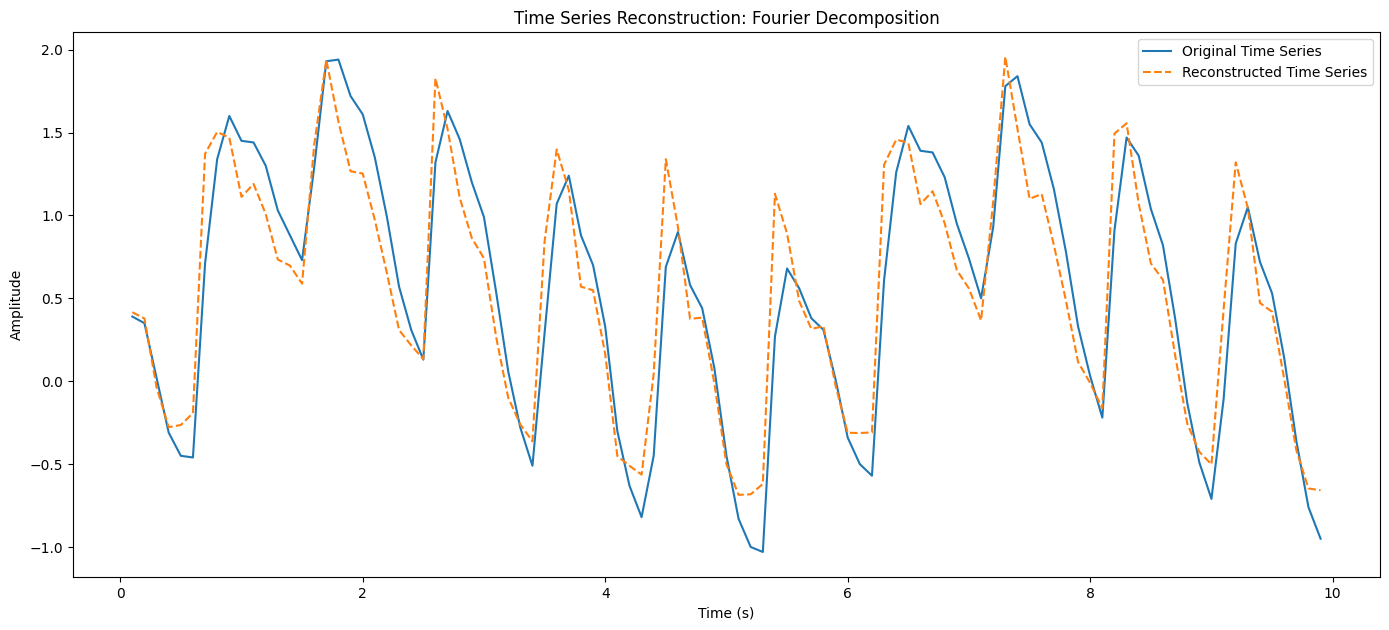

In [25]:
# Create a sample time series (sine waves with noise)
#reconstructed_series, freqs, magnitude = reconstruct_time_series(y, 1/np.diff(x).mean())
reconstructed_series, param = fit_arima_and_reconstruct(y, order=(2,0,0))

# Plot the original and reconstructed time series
plt.figure(figsize=(14, 12))
plt.subplot(2, 1, 1)
t = x[1:]
plt.plot(t, y[:len(y)-1], label="Original Time Series")
plt.plot(t, reconstructed_series[1:], label="Reconstructed Time Series", linestyle="--")
plt.legend()
plt.title("Time Series Reconstruction: Fourier Decomposition")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# # Plot the Fourier transform
# plt.subplot(2, 1, 2)
# plt.stem(freqs[:len(freqs)//2], magnitude[:len(freqs)//2], basefmt=" ")
# plt.title("Fourier Transform Magnitude (Original)")
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

In [138]:
df = pd.read_csv('data/local_cycles/50.csv')
x = df['timestamp_ns'].values
y = df['height_inv_mm'].values

/opt/miniconda3/envs/playground/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/miniconda3/envs/playground/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/miniconda3/envs/playground/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/miniconda3/envs/playground/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  2., 10., 13.,  7., 10.,  6.]),
 array([0.98645855, 1.03334795, 1.08023735, 1.12712676, 1.17401616,
        1.22090556, 1.26779496, 1.31468436, 1.36157376, 1.40846316,
        1.45535256, 1.50224196, 1.54913136, 1.59602076, 1.64291016,
        1.68979956, 1.73668896, 1.78357836, 1.83046776, 1.87735716,
        1.92424656]),
 <BarContainer object of 20 artists>)

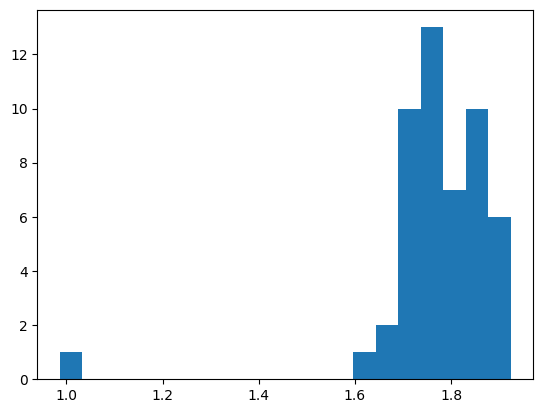

In [78]:
arr = []
for i in range(50):
    df = pd.read_csv(f'data/local_cycles/{i}.csv')
    x = df['timestamp_ns'].values
    y = df['height_inv_mm'].values
    reconstructed_series, freqs, magnitude = reconstruct_time_series(y, 1/np.diff(x).mean())
    reconstructed_series, param = fit_arima_and_reconstruct(y, order=(2,0,0))
    arr.append(param[1])

plt.hist(arr, bins=20)

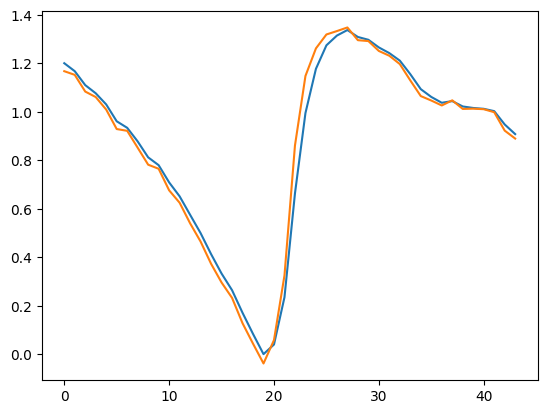

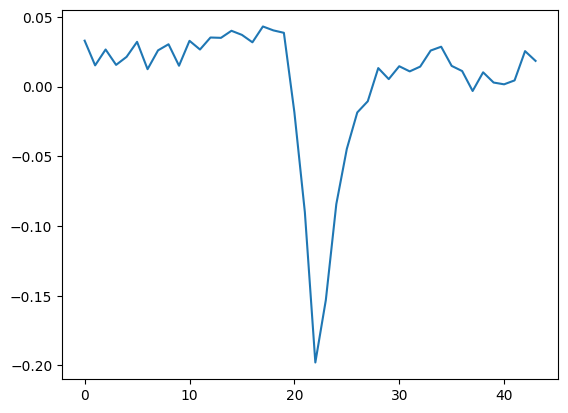

In [84]:
plt.plot(y[:-1])
new_time_series = [y[0], y[1]]
for i in range(2, len(y)):
    new_time_series.append(y[i-1] + 0.4616*(y[i-1] - y[i-2]))
plt.plot(new_time_series[1:])
plt.show()
plt.plot(y[:-1] - np.array(new_time_series)[1:])

In [50]:
a = [1,2]
for i in range(100):
    a.append(0.6*a[-1] + 0.3*a[-2]+ 1)
x = []
y = []
for i in range(len(a)-2):
    x.append([a[i], a[i+1], 1])
    y.append(a[i+2])

x = np.array(x)
y = np.array(y)

print( np.linalg.inv(x.T @ x) @ (x.T @ y))

[0.3 0.6 1. ]


In [86]:
np.diff(x/1_000_000).mean(), np.diff(x/1_000_000).std()

(20.871893783783786, 1.382300346152666)

In [100]:
np.max(np.abs(np.diff(y)))

0.222382

In [99]:
np.max(np.abs(y - reconstructed_series))

0.22092647271797614

Epoch 0/100000, Loss: 1.080489
Epoch 10000/100000, Loss: 0.646900
Epoch 20000/100000, Loss: 0.646900
Epoch 30000/100000, Loss: 0.646900
Epoch 40000/100000, Loss: 0.646900
Epoch 50000/100000, Loss: 0.646900
Epoch 60000/100000, Loss: 0.646900
Epoch 70000/100000, Loss: 0.646900
Epoch 80000/100000, Loss: 0.646900
Epoch 90000/100000, Loss: 0.646900
Learned Parameters: [ 0.75192781  1.00969344 -0.30928497]
Final Loss: 0.634200


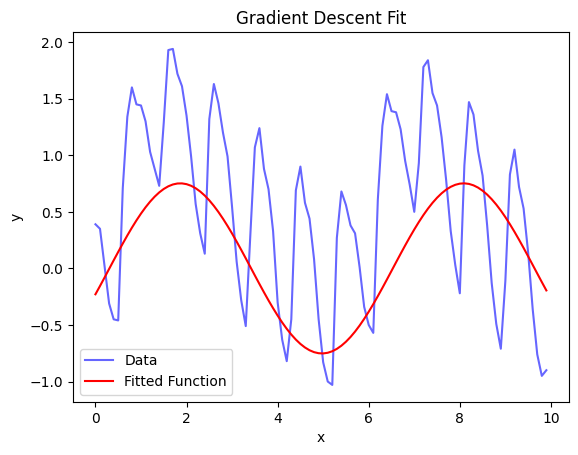

In [123]:
import numpy as np

# Function to evaluate the model
def evaluate_model(params, x):
    a, b, c = params
    return a * np.sin(b * x + c)

# Function to compute the loss (mean squared error)
def compute_loss(params, data):
    x, y = data
    predictions = evaluate_model(params, x)
    return np.mean((predictions - y) ** 2)

# Function to perform gradient descent
def gradient_descent(data, learning_rate, epochs, initial_params):
    x, y = data
    params = np.array(initial_params)

    for epoch in range(epochs):
        # Gradients for each parameter
        gradients = np.zeros_like(params)
        predictions = evaluate_model(params, x)
        errors = predictions - y

        gradients[0] = np.mean(2 * errors * np.sin(params[1] * x + params[2]))
        gradients[1] = np.mean(2 * errors * params[0] * x * np.cos(params[1] * x + params[2]))
        gradients[2] = np.mean(2 * errors * params[0] * np.cos(params[1] * x + params[2]))

        # Update parameters
        params -= learning_rate * gradients

        # Optionally, print the loss for debugging
        if epoch % (epochs // 10) == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {compute_loss(params, data):.6f}")

    return params


data = (x, y)

# Initial parameters
initial_params = [1, 1.0, 1.0]
learning_rate = 0.1
epochs = 100000

# Fit the model
learned_params = gradient_descent(data, learning_rate, epochs, initial_params)

# Print results
print("Learned Parameters:", learned_params)

# Compute final loss
final_loss = compute_loss(learned_params, data)
print(f"Final Loss: {final_loss:.6f}")

# Optional: Plot results
import matplotlib.pyplot as plt

plt.plot(x, y, label="Data", color="blue", alpha=0.6)
plt.plot(x, evaluate_model(learned_params, x), label="Fitted Function", color="red")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient Descent Fit")
plt.show()


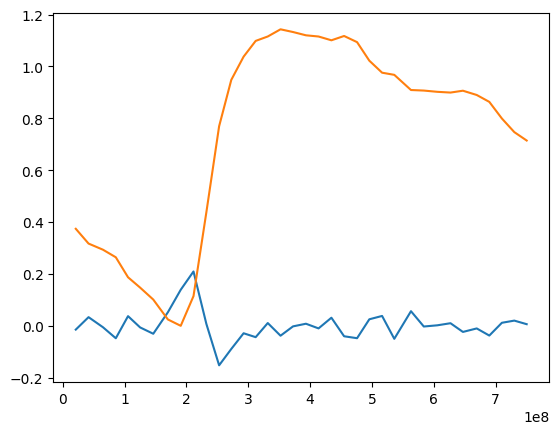

In [140]:
plt.plot(x[1:-1], np.diff(np.diff(y)))
plt.plot(x[1:-1], y[1:-1])

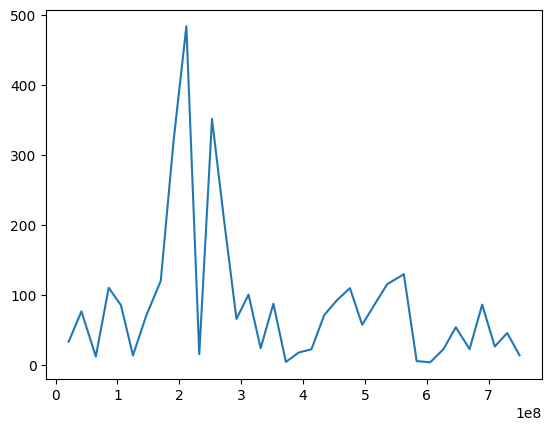

In [151]:
plt.plot(x[1:-1],np.abs(np.diff(np.diff(y))/0.0208**2))

In [144]:
np.diff(x).mean()/1e9

0.020871893783783783

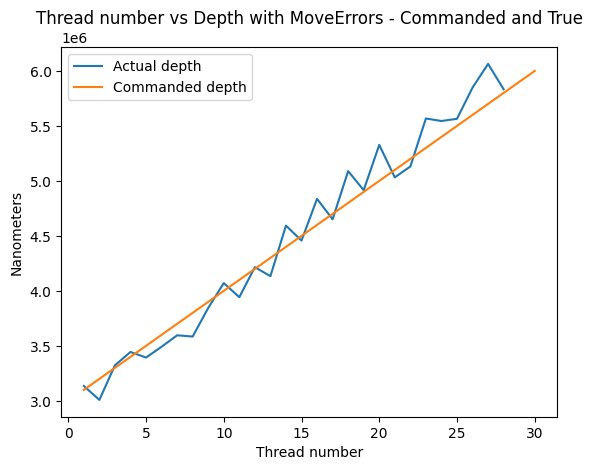

In [55]:
# y_values = [
#     3516258, 2534433, 3630557, 3556578, 3445651, 3840314, 3186063, 4576242, 3625266, 4510297, 3980809, 4335072, 4201374, 3857635, 4963893, 4023798, 4788788, 5485931, 4441175, 5767516, 5007125, 4964097, 5677922, 4538296, 5604448, 6137265, 5245269, 5856350, 6773288, 5417013,
# ]

#y_values = [3457382, 2796279, 3813517, 2971414, 4042913, 3229188, 4229704, 3128911, 4276850, 3252993, 4382665, 6215364, 3826036, 5071079, 4388074, 4812937, 5001536, 4213061, 5486748, 4454808, 5738812, 5148052, 4830423, 5843950, 4968533, 5532347, 6593028, 5691938, 5882704, 6701050,]

#y_values = [3551497, 2657942, 3570108, 2804724, 3516441, 4046215, 3316145, 4576997, 3691543, 4494426, 3974117, 4299256, 4788317, 3703547, 4963343, 4212216, 5099381, 5578379, 4576110, 5658582, 5386737, 4607030, 5782175, 4550782, 5239871, 6279869, 5564883, 5754157, 6810024, 5628893]

#y_values = [2935528, 4753584, 2671970, 3921771, 3427812, 3825304, 4100017, 3701252, 4341719, 3516484, 4484143, 3310056, 4670558, 4206454, 4214984, 5402470, 4400476, 5239634, 5095913, 4596700, 5537904, 4414524, 5255832, 5967817, 5116329, 5753072, 6602284, 5180734, 6393872, 6087486]

y_values = [2579035, 2662534, 2684173, 2826151, 3012986, 2931519, 3113758, 3232751, 3377158, 3430594, 3510494, 3604490, 3712375, 3807266, 3807512, 3938954, 4043071, 4183028, 4293259, 4220759, 4335811, 4551778, 4595705, 4739718, 4821622, 4834870, 4891551, 5061577, 5200240, 5295401,]

y_values = [2533044, 2669613, 2851318, 2956940, 2979375, 3078652, 3096710, 3326476, 3349499, 3402420, 3547803, 3586453, 3665142, 3822124, 3824345, 3935531, 4054548, 4188199, 4227697, 4337472, 4365733, 4446126, 4563437, 4613071, 4765291, 4919966, 4882760, 5009114, 5145110, 5263018,]

y_values= [2623297, 2723963, 2864959, 2914945, 2991653, 3085486, 3161942, 3266009, 3383881, 3429101, 3585194, 3609330, 3758752, 3835060, 3879773, 3956010, 4126538, 4150160, 4229879, 4341022, 4413744, 4552823, 4639505, 4712158, 4774589, 4902991, 4955104, 5097393, 5198038, 5288980]

y_values = [2972920, 3212212, 3325288, 3235111, 3535178, 3546552, 3366469, 3831267, 3716126, 3914431, 4072173, 4026745, 4232727, 4417164, 4680686, 4555329, 4635470, 4988740, 4898330, 5134241, 5130087, 5040188, 5179550, 5644429, 5614310, 5829713, 5443127, 5659920, 6246566, 5854921,]

y_values = [3133150, 3328491, 3288457, 3222756, 3694160, 3425074, 3523667, 3710375, 4027589, 3765938, 4028525, 4216285, 4498937, 4240822, 4468634, 4498221, 4608807, 4912853, 4891548, 4818697, 4995469, 5309576, 5550416, 5349081, 5915726, 5739399, 6144297, 5982441, 6001936, 5809539,]

y_values = [2909637, 3153969, 3143652, 3465144, 3412956, 3456803, 3611058, 3568698, 3921097, 4013965, 4093475, 4242971, 4173028, 4494966, 4486035, 4365319, 4849535, 4880646, 4982019, 4956244, 4986825, 4922844, 5382902, 5535663, 5364073, 5618919, 5607487, 5771437, 5973979, 6041238]

y_values = [2962096, 2989098, 3206437, 3092651, 3318044, 3526116, 3573620, 3523832, 3916679, 3911574, 4077769, 4191794, 4422181, 4441397, 4437269, 4285824, 4718357, 4811822, 4865246, 5153880, 5053809, 5116712, 5278586, 5626226, 5562850, 5484605, 5933592, 5905660, 6022388, 6208704]

y_values = [3022280, 1370523, 3126221, 3197949, 3356625, 3449513, 3510225, 3599184, 2391356, 3794064, 3791692, 4096735, 4281150, 1151301, 4471644, 4641924, 4497066, 4660389, 2079965, 4853382, 4928169, 3677880, 5092875, 5435962, 5225440, 803766, 5656691, 3436130, 2026034, 5770901, 5719168, 5863828, 5923698, 5908481,]

y_values = [2954623, 2897846, 1202760, 2210866, 3406180, 3472601, 3579895, 3750961, 3717584, 3994711, 3859092, 4001123, 4120799, 4379614, 4610950, 4567548, 4647850, 1860883, 4802114, 4903949, 4870070, 4803793, 5220658, 5035627, 5495619, 5566774, 5106027, 5796369, 5903694, 5720046, 5834790, 4697171,]

y_values = [3135173, 3008352, 3322741, 3444139, 3393810, 3491624, 3595884, 3584796, 3844715, 4070740, 3942438, 4215683, 4133678, 4593060, 4457475, 4836699, 4650952, 5088636, 4915651, 5327409, 5032253, 5130905, 5567493, 5544641, 5564661, 5847991, 6063642, 5832957]

y_true = [
                                                        3_100_000, 3_200_000, 3_300_000, 3_400_000, 3_500_000,
                                                        3_600_000, 3_700_000, 3_800_000, 3_900_000, 4_000_000,
                                                        4_100_000, 4_200_000, 4_300_000, 4_400_000, 4_500_000,
                                                        4_600_000, 4_700_000, 4_800_000, 4_900_000, 5_000_000,
                                                        5_100_000, 5_200_000, 5_300_000, 5_400_000, 5_500_000,
                                                        5_600_000, 5_700_000, 5_800_000, 5_900_000, 6_000_000]

# Generating corresponding x-values (1 to 23)
x_values = list(range(1, len(y_values) + 1))

plt.plot(x_values, y_values, label="Actual depth")
plt.plot(list(range(1, len(y_true) + 1)), y_true, label="Commanded depth")
plt.xlabel("Thread number")
plt.ylabel("Nanometers")
plt.title("Thread number vs Depth with MoveErrors - Commanded and True")
plt.legend()


In [49]:
np.abs((np.array(y_values) - np.array(y_true))).std()

ValueError: operands could not be broadcast together with shapes (31,) (30,) 

In [42]:
np.abs((np.array(y_values) - np.array(y_true)))

array([ 33150, 128491,  11543, 177244, 194160, 174926, 176333,  89625,
       127589, 234062,  71475,  16285, 198937, 159178,  31366, 101779,
        91193, 112853,   8452, 181303, 104531, 109576, 250416,  50919,
       415726, 139399, 444297, 182441, 101936, 190461])

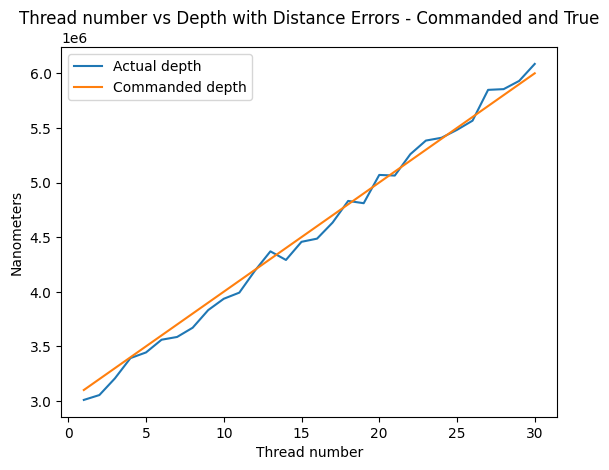

In [38]:
t = [3100000, 3009265, 0, 
3200000, 3053796, 1, 
3300000, 3206654, 2, 
3400000, 3392324, 3, 
3500000, 3444073, 4, 
3600000, 3560454, 5, 
3700000, 3585807, 6, 
3800000, 3670304, 7, 
3900000, 3831857, 8, 
4000000, 3935412, 9, 
4100000, 3991604, 10, 
4200000, 4191630, 11, 
4300000, 4369618, 12, 
4400000, 4290827, 13, 
4500000, 4456932, 14, 
4600000, 4485952, 15, 
4700000, 4633024, 16, 
4800000, 4831229, 17, 
4900000, 4810392, 18, 
5000000, 5069255, 19, 
5100000, 5063575, 20, 
5200000, 5259264, 21, 
5300000, 5383939, 22, 
5400000, 5409458, 23, 
5500000, 5481959, 24, 
5600000, 5566133, 25, 
5700000, 5848218, 26, 
5800000, 5854904, 27, 
5900000, 5930249, 28, 
6000000, 6085750, 29,]
y_command = t[::3]
y_actual = t[1::3]

# Generating corresponding x-values (1 to 23)
x_values = list(range(1, len(y_actual) + 1))

plt.plot(x_values, y_actual, label="Actual depth")
plt.plot(x_values, y_command, label="Commanded depth")
plt.xlabel("Thread number")
plt.ylabel("Nanometers")
plt.title("Thread number vs Depth with Distance Errors - Commanded and True")
plt.legend()

In [36]:
np.abs((np.array(y_actual) - np.array(y_command))).mean()

114768.63333333333

In [63]:
np.abs((np.array(y_actual) - np.array(y_command)))

array([149994, 154837,  43712,  37246,   1425,  64701, 115846, 126469,
        55615, 155639,  13180, 154748,  58426, 305414,  46562, 300093,
        51266, 159348,  73805,  13905, 131752,  72041, 194335,  52982,
       133442, 244510])

In [13]:
np.abs(np.divide(np.diff(y), np.diff(x)))

array([ 0.4,  3.3,  3.3,  1.4,  0.1, 11.7,  6.3,  2.6,  1.5,  0.1,  1.4,
        2.7,  1.5,  1.5,  5.6,  6.4,  0.1,  2.2,  1.1,  2.6,  3.6,  4.2,
        2.6,  1.8, 11.9,  3.1,  1.7,  2.6,  2.1,  4.5,  4.8,  3.4,  2.3,
        8. ,  7.8,  1.7,  3.6,  1.8,  3.7,  6.3,  3.3,  1.9,  3.7, 11.4,
        2.1,  3.2,  1.4,  3.6,  5.3,  3.8,  1.7,  0.3, 13. ,  4.1,  1.2,
        1.8,  0.7,  3. ,  3.5,  1.6,  0.7, 11.8,  6.5,  2.8,  1.5,  0.1,
        1.5,  2.8,  2.1,  2.4,  4.3,  8.5,  0.6,  2.9,  1.1,  2.8,  3.8,
        4.5,  3. ,  2.5, 11.3,  5.6,  1.1,  3.2,  2.2,  4.4,  5.1,  3.6,
        2.2,  6. ,  9.4,  2.2,  3.3,  1.9,  3.9,  5. ,  4. ,  1.9,  0.5])

Text(0.5, 1.0, 'Simulated vs Actual Data Comparison for robot sim')

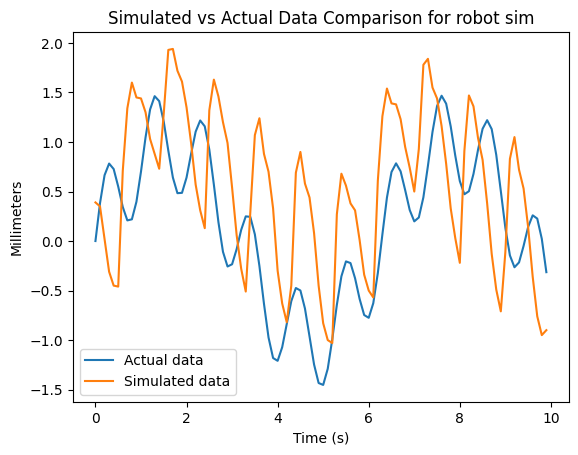

In [26]:
simulated = 0.5*np.sin(6*x) + np.sin(x)
plt.plot(x, simulated, label = "Actual data")
plt.plot(x, y, label = "Simulated data")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Millimeters")
plt.title("Simulated vs Actual Data Comparison for robot sim")

In [21]:
np.diff(x)

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [23]:
len(x)

100